# Generalized Linear Models for Binary Data (Lab2)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [59]:
!pip install wooldridge
!pip install linearmodels
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example. will you get a loan ?

#### describe the dataset

In [60]:
LoanApplicationDataFrame=woo.dataWoo('loanapp')

In [61]:
LoanApplicationDataFrame

,occ,loanamt,action,msa,suffolk,appinc,typur,unit,married,dep,...,approve,mortno,mortperf,mortlat1,mortlat2,chist,multi,loanprc,thick,white
0,1,89,1,1120,0,72,0,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.754237,0.0,1
1,1,128,3,1120,0,74,0,1.0,1.0,1.0,...,0,0,1,0,0,1,0.0,0.800000,1.0,1
2,1,128,1,1120,0,84,3,1.0,0.0,0.0,...,1,0,1,0,0,1,0.0,0.895105,1.0,1
3,1,66,1,1120,0,36,0,1.0,1.0,0.0,...,1,0,1,0,0,0,0.0,0.600000,0.0,1
4,1,120,1,1120,0,59,8,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.895522,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,158,1,1120,0,96,0,1.0,1.0,0.0,...,1,0,1,0,0,1,0.0,0.897727,0.0,1
1985,1,35,1,1120,0,169,1,1.0,1.0,0.0,...,1,1,0,0,0,1,0.0,0.111111,0.0,1
1986,2,225,1,1120,0,49,0,2.0,1.0,0.0,...,1,0,1,0,0,1,1.0,1.000000,0.0,1
1987,1,98,1,1120,1,110,1,1.0,0.0,0.0,...,1,1,0,0,0,1,0.0,0.455814,0.0,1


In [62]:
LoanApplicationDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 59 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   occ       1989 non-null   int64  
 1   loanamt   1989 non-null   int64  
 2   action    1989 non-null   int64  
 3   msa       1989 non-null   int64  
 4   suffolk   1989 non-null   int64  
 5   appinc    1989 non-null   int64  
 6   typur     1989 non-null   int64  
 7   unit      1985 non-null   float64
 8   married   1986 non-null   float64
 9   dep       1986 non-null   float64
 10  emp       1989 non-null   int64  
 11  yjob      1989 non-null   int64  
 12  self      1989 non-null   int64  
 13  atotinc   1989 non-null   float64
 14  cototinc  1989 non-null   float64
 15  hexp      1989 non-null   float64
 16  price     1989 non-null   float64
 17  other     1989 non-null   float64
 18  liq       1989 non-null   float64
 19  rep       1980 non-null   float64
 20  gdlin     1989 non-null   int6

In [63]:
LoanApplicationDataFrame[['approve',"white", "hrat", "obrat", "loanprc", "unem", "male", "married", "dep", "sch", "cosign", "chist", "pubrec", "mortlat1", "mortlat2", "vr"]]

,approve,white,hrat,obrat,loanprc,unem,male,married,dep,sch,cosign,chist,pubrec,mortlat1,mortlat2,vr
0,1,1,17.629999,34.500000,0.754237,3.2,NaN,0.0,0.0,1,0,1,0,0,0,1
1,0,1,22.540001,34.099998,0.800000,3.2,1.0,1.0,1.0,1,0,1,0,0,0,1
2,1,1,19.000000,26.000000,0.895105,3.9,1.0,0.0,0.0,1,0,1,0,0,0,0
3,1,1,24.000000,37.000000,0.600000,3.1,1.0,1.0,0.0,1,0,0,1,0,0,1
4,1,1,25.100000,32.099998,0.895522,4.3,1.0,1.0,0.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,1,20.299999,29.299999,0.897727,4.3,1.0,1.0,0.0,1,0,1,0,0,0,1
1985,1,1,8.000000,20.000000,0.111111,3.2,1.0,1.0,0.0,1,0,1,0,0,0,0
1986,1,1,56.099998,60.500000,1.000000,3.2,1.0,1.0,0.0,0,0,1,0,0,0,0
1987,1,1,16.000000,17.000000,0.455814,3.2,1.0,0.0,0.0,1,0,1,0,0,0,1


### We are interested in determining the impact of factors such as being white or being married on the probability of having a bank loan accepted.

In [64]:
# Compute the correlation matrix
corr = LoanApplicationDataFrame[['approve',"white", "hrat", "obrat", "loanprc", "unem", "male", "married", "dep", "sch", "cosign", "chist", "pubrec", "mortlat1", "mortlat2", "vr"]].corr()

round(corr,3)

,approve,white,hrat,obrat,loanprc,unem,male,married,dep,sch,cosign,chist,pubrec,mortlat1,mortlat2,vr
approve,1.000,0.221,-0.068,-0.175,-0.158,-0.052,0.017,0.060,-0.025,0.045,-0.009,0.234,-0.267,-0.060,-0.051,-0.081
white,0.221,1.000,-0.035,-0.105,-0.166,0.016,0.058,0.006,-0.064,0.105,-0.035,0.143,-0.152,-0.021,-0.010,-0.093
hrat,-0.068,-0.035,1.000,0.638,0.145,-0.022,-0.071,-0.043,0.015,-0.034,-0.055,0.001,0.026,-0.030,-0.020,-0.019
obrat,-0.175,-0.105,0.638,1.000,0.199,-0.010,-0.015,-0.030,0.028,-0.036,0.037,-0.086,0.084,0.062,0.001,0.018
loanprc,-0.158,-0.166,0.145,0.199,1.000,0.009,-0.015,-0.036,-0.070,-0.079,-0.029,-0.062,0.088,0.031,-0.040,0.045
unem,-0.052,0.016,-0.022,-0.010,0.009,1.000,0.110,0.024,0.031,-0.143,0.019,0.018,0.022,0.059,0.052,0.012
male,0.017,0.058,-0.071,-0.015,-0.015,0.110,1.000,0.348,0.167,-0.039,0.028,-0.001,0.003,0.010,0.050,-0.041
married,0.060,0.006,-0.043,-0.030,-0.036,0.024,0.348,1.000,0.358,-0.053,0.028,-0.031,-0.004,-0.008,0.023,-0.095
dep,-0.025,-0.064,0.015,0.028,-0.070,0.031,0.167,0.358,1.000,-0.085,0.022,-0.013,0.063,0.039,0.079,-0.017
sch,0.045,0.105,-0.034,-0.036,-0.079,-0.143,-0.039,-0.053,-0.085,1.000,-0.100,0.053,-0.008,-0.003,0.021,-0.044


#### We observe weak levels of correlation the response variable "approve" and being of white ethnicity

## 1. The model

#### We will assume that the random variable approve follows a binomial distribution
$Y_i\sim Binomial(n,p)$


#### We assume a logit function, this means that we are assuming that the log odds of the outcome can be modeled as a linear combination of the factors under consideration.

$ logit(P(approve=1))=log(\frac{P(approve=1)}{P(approve=0)})=\beta_0+\beta_1*white+\ldots+\beta_p*X_p $


## 2. Estimation of the parameters

In [65]:
reg1 = smf.glm(formula='approve ~ white+hrat+ obrat+ loanprc+ unem+ male+ married+ dep+ sch+ cosign+ chist+ pubrec+ mortlat1+ mortlat2+ vr  ', data=LoanApplicationDataFrame,family=sm.families.Binomial())

# We fit the model
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                approve   No. Observations:                 1971
Model:                            GLM   Df Residuals:                     1955
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -600.50
Date:                Thu, 19 Jan 2023   Deviance:                       1201.0
Time:                        14:03:58   Pearson chi2:                 1.96e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8017      0.595      6.393      0.000       2.636       4.967
white          0.9378      0.173      5.424      0.000       0.599       1.277
hrat           0.0133      0.013      1.030      0.303      -0.012       0.039
obrat         -0.0530      0.011     -4.701      0.000      -0.075      -0.031
loanprc       -1.9050      0.460     -4.137      0.000      -2.807      -1.002
unem          -0.0666      0.033     -2.029      0.042      -0.131      -0.002
male          -0.0664      0.206     -0.322      0.748      -0.471       0.338
married        0.5033      0.178      2.827      0.005       0.154       0.852
dep           -0.0907      0.073     -1.237      0.216      -0.234       0.053
sch            0.0412      0.178      0.231      0.817      -0.308       0.391
cosign         0.1321      0.446      0.296      0.767      -0.742       1.006
chist          1.0666      0.171      6.230      0.000       0.731       1.402
pubrec        -1.3407      0.217     -6.168      0.000      -1.767      -0.915
mortlat1      -0.3099      0.464     -0.669      0.504      -1.218       0.599
mortlat2      -0.8947      0.569     -1.574      0.116      -2.009       0.220
vr            -0.3498      0.154     -2.276      0.023      -0.651      -0.049
==============================================================================
"""

## 3. Model interpretation:


#### The white effect is large and statistically significant (p-value:0.000). Loan applications from white people increases the log odds of acceptance by 0.9378.

#### The married effect is large and statistically significant (p-value:0.005). Loan applications from married people increases the log odds of acceptance by 0.5033.





#### The mean of mentalImpair decreases 0.0975 points for each additional point of improvement in ses (socio economic status).

#### The mean of mentalImpair increases  0.1033 points for each additional point of lifeEvents (traumatic episodes).


###4. Analysis

#### based on the results of the model we conclude that being white increases your chances of having a bank loan accepted.

#### We can explore visually the evolution of probabilities according to ethnicity and marital status



In [66]:
X=LoanApplicationDataFrame[['approve',"white", "hrat", "obrat", "loanprc", "unem", "male", "married", "dep", "sch", "cosign", "chist", "pubrec", "mortlat1", "mortlat2", "vr"]]


In [81]:
Y_predicted=pd.Series(results1.predict(X))
Y_predicted.rename("approve_predicted",inplace=True);

In [82]:
LoanApplicationDataFramePredictions=pd.concat([X,Y_predicted],axis=1)

In [83]:
LoanApplicationDataFramePredictions

,approve,white,hrat,obrat,loanprc,unem,male,married,dep,sch,cosign,chist,pubrec,mortlat1,mortlat2,vr,approve_predicted
0,1,1,17.629999,34.500000,0.754237,3.2,NaN,0.0,0.0,1,0,1,0,0,0,1,NaN
1,0,1,22.540001,34.099998,0.800000,3.2,1.0,1.0,1.0,1,0,1,0,0,0,1,0.930675
2,1,1,19.000000,26.000000,0.895105,3.9,1.0,0.0,0.0,1,0,1,0,0,0,0,0.936388
3,1,1,24.000000,37.000000,0.600000,3.1,1.0,1.0,0.0,1,0,0,1,0,0,1,0.630370
4,1,1,25.100000,32.099998,0.895522,4.3,1.0,1.0,0.0,0,0,1,0,0,0,0,0.946912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,1,20.299999,29.299999,0.897727,4.3,1.0,1.0,0.0,1,0,1,0,0,0,1,0.934213
1985,1,1,8.000000,20.000000,0.111111,3.2,1.0,1.0,0.0,1,0,1,0,0,0,0,0.992644
1986,1,1,56.099998,60.500000,1.000000,3.2,1.0,1.0,0.0,0,0,1,0,0,0,0,0.840300
1987,1,1,16.000000,17.000000,0.455814,3.2,1.0,0.0,0.0,1,0,1,0,0,0,1,0.974921


In [84]:
LoanApplicationDataFramePredictions.groupby('white')[['approve','approve_predicted']].mean()

,approve,approve_predicted
white,,
0,0.707792,0.702970
1,0.908388,0.907674


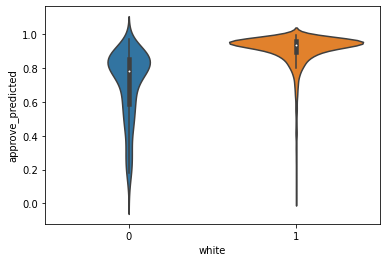

In [85]:
sns.violinplot(data=LoanApplicationDataFramePredictions, y="approve_predicted", x="white")

#### The figure above reveals the positive impact of being "white" on getting a bank loan approved.

In [86]:
LoanApplicationDataFramePredictions.groupby('married')[['approve','approve_predicted']].mean()

,approve,approve_predicted
married,,
0.0,0.849558,0.847988
1.0,0.891437,0.890769


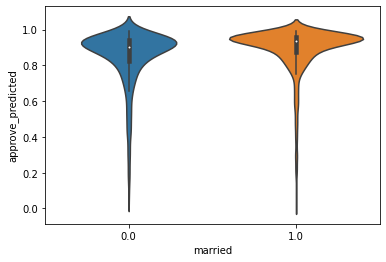

In [80]:
sns.violinplot(data=LoanApplicationDataFramePredictions, y="approve_predicted", x="married")

#### The figure above reveals the positive impact of being "married" on getting a bank loan approved.